<a href="https://colab.research.google.com/github/akash-sureshkumar/Gold_sales_dashboard/blob/main/dataprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 here is the dataset: 
         Date        Product  Units_Sold
0  2023-01-01      Gold Ring          91
1  2023-01-01     Gold Chain          41
2  2023-01-01      Gold Coin          41
3  2023-01-01    Gold Bangle          30
4  2023-01-01  Gold Necklace          99

 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        525 non-null    object
 1   Product     525 non-null    object
 2   Units_Sold  525 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.4+ KB
None


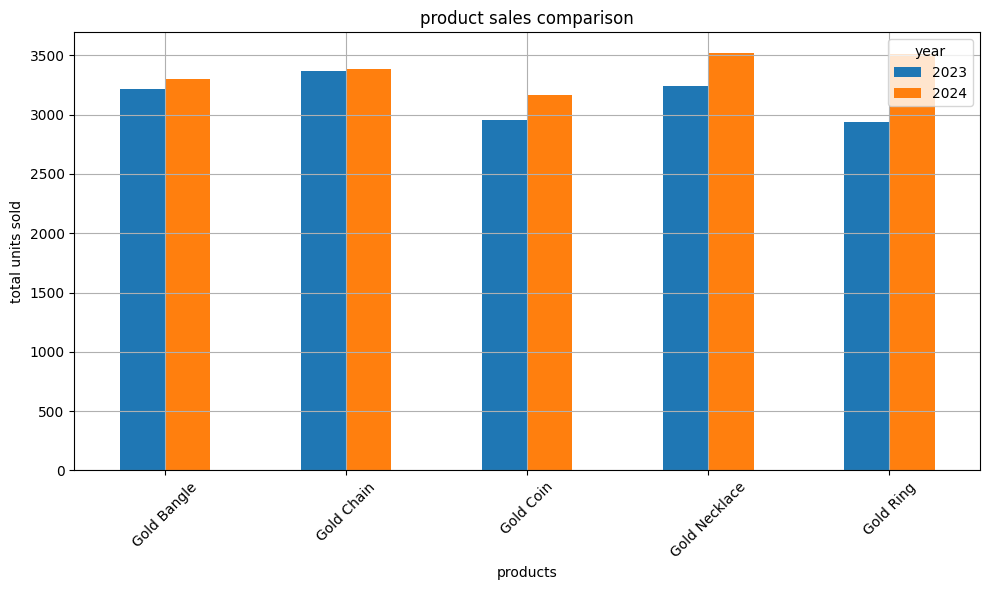

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df=pd.read_csv('https://raw.githubusercontent.com/akash-sureshkumar/Gold_sales_dashboard/5174013e5d480cfbeb07a371cd073065aa2e5257/gold_sales_2023_2024.csv')

print(" here is the dataset: ")
print(df.head())
print("\n info:")
print(df.info())

df['date'] = pd.to_datetime(df['Date'])

df['year'] = df['date'].dt.year
product_summary = df.groupby(['Product', 'year'])['Units_Sold'].sum().reset_index()

product_pivot = product_summary.pivot(index='Product', columns='year', values='Units_Sold').fillna(0)


product_pivot.plot(kind='bar', figsize=(10,6))
plt.title("product sales comparison")
plt.xlabel("products")
plt.ylabel("total units sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("product sales comparison matplotlib_png") # Corrected saverig to savefig
plt.show()

fig = px.bar(product_summary,
             x='Product',
             y='Units_Sold',
             color='year',
             barmode='group',
             title="product sales 2023 vs 2024 (Interactive)")
fig.show()

df.to_csv("cleaned gold datasets", index=False)